# Capstone Project. Where to buy a new apartment in Santiago, Chile.

In [1]:
### Retrieveng and Wrangling data.
import pandas as pd
file1 = '/Users/diegop/Desktop/Capstone_Project/new.csv'
df_new = pd.read_csv(file1, decimal=',')
df_new.head()

,Departamentos nuevos
Comuna,UF por m2
Vitacura,"106,9"
Las Condes,"100,6"
Providencia,"97,5"
Lo Barnechea,"93,2"


In [2]:
# Removing the first row. We will later convert UF per m2 to USD per m2
df_new.drop('Comuna', inplace = True)

# Renaming the column
df_new.columns = ['USD/m2']

In [3]:
# Replacing commas for dots in order to transform the column to a float
df_new.apply(lambda x: x.str.replace(',','.'))
df_new = df_new.stack().str.replace(',','.').unstack()

# Adding new rows for missing communes

df2 = pd.DataFrame({"USD/m2":[52.5, 52.5, round(((43.8 + 54.5 + 58.4)/3),1), round(((43.8 + 54.5 + 58.4)/3),1), 48.2, 46.5, 47.3]})
df_new = df_new.append(df2, ignore_index = False)
df_new.rename(index = {0:'Lo Prado', 1:'Cerro Navia', 2:'Pedro Aguirre Cerda', 3:'Lo Espejo',
                       4:'La Granja', 5:'La Pintana', 6:'El Bosque'}, inplace = True)

df_new.head()

,USD/m2
Vitacura,106.9
Las Condes,100.6
Providencia,97.5
Lo Barnechea,93.2
Ñuñoa,82.0


In [4]:
# Converting the whole column from str to float in order to operate with it
df_new['USD/m2'] = df_new['USD/m2'].astype(float)

# Conversion from U.F. to USD (1 U.F. = 28614 CLP = 34.9 USD). Price converted to thousand dollars
df_new['USD/m2'] = df_new['USD/m2']*34.9/1000

# Finally, we sort the dataframe in a descending way.
df_new.sort_values('USD/m2', ascending = False, inplace = True)

df_new.head()

,USD/m2
Vitacura,3.73081
Las Condes,3.51094
Providencia,3.40275
Lo Barnechea,3.25268
Ñuñoa,2.86180


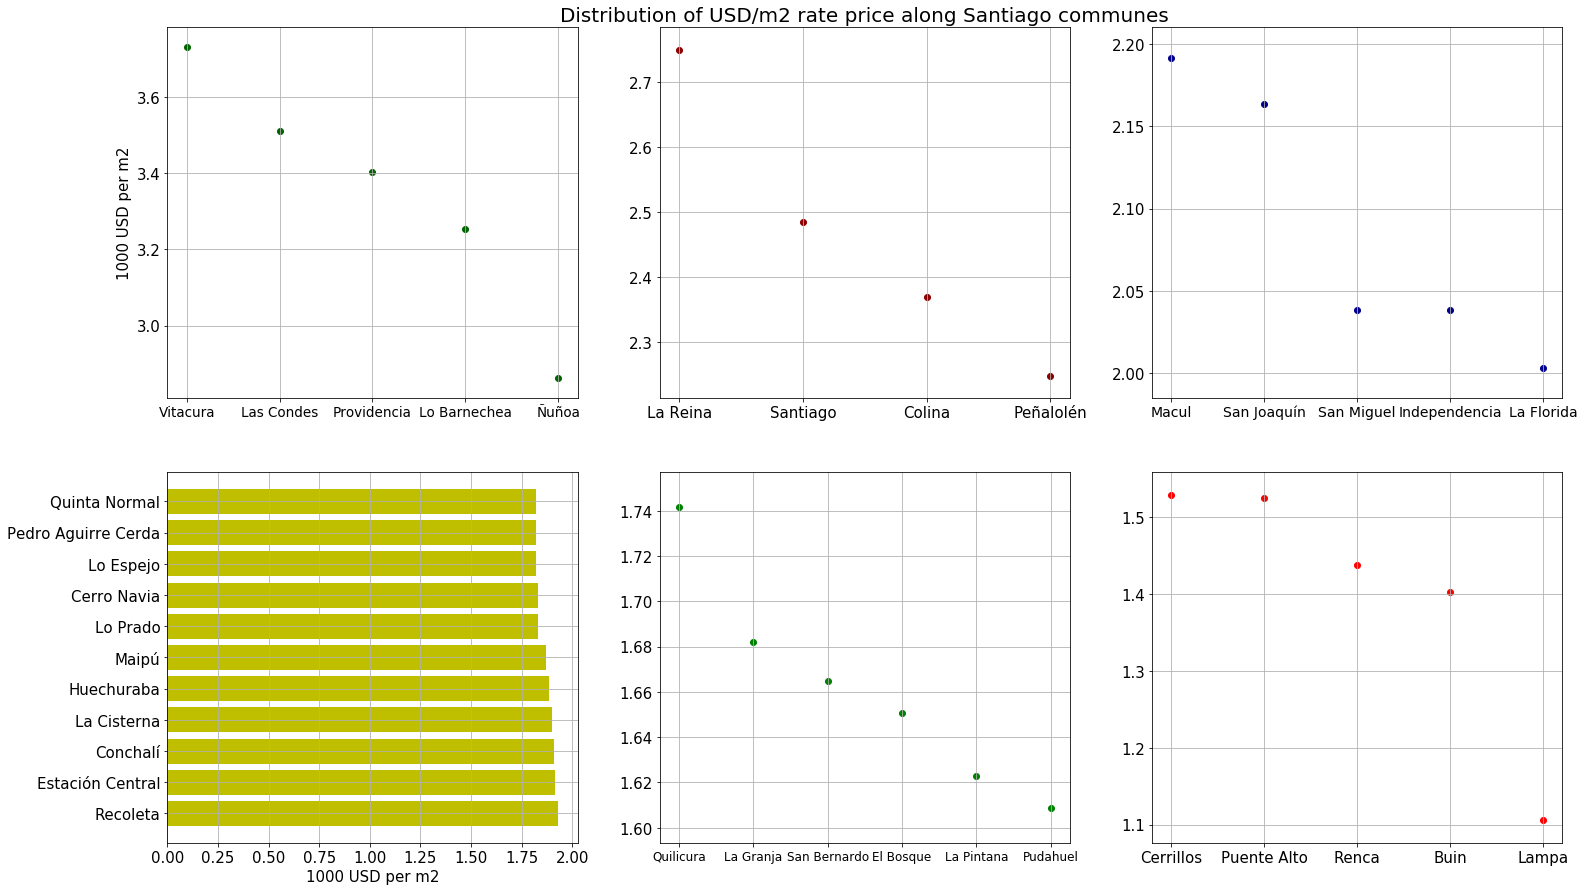

In [5]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


# The dataset will be devided in 6 zones in order to properly visualize the trends 
#(from the most expensie to the cheapest communes)

# Zone 1
zone1 = df_new[df_new['USD/m2'] > 2.8]

# Zone 2
zone2 = df_new[(df_new['USD/m2'] > 2.2) & (df_new['USD/m2'] <= 2.8)]

# Zone 3
zone3 = df_new[(df_new['USD/m2'] > 2.0) & (df_new['USD/m2'] <= 2.2)]

# Zone 4
zone4 = df_new[(df_new['USD/m2'] > 1.8) & (df_new['USD/m2'] <= 2.0)]

# Zone 5
zone5 = df_new[(df_new['USD/m2'] > 1.6) & (df_new['USD/m2'] <= 1.8)]

# Zone 6
zone6 = df_new[df_new['USD/m2'] <=1.6]

# The canvas will be devided in 6 plots 

fig, axes = plt.subplots(2,3, figsize=(25,15))

# Zone 1 plot

axes[0,0].set_ylabel("1000 USD per m2", fontsize = 15)
axes[0,0].scatter(zone1.index, zone1['USD/m2'], c = 'DarkGreen')
axes[0,0].tick_params(axis='y', which='major', labelsize=15)
axes[0,0].tick_params(axis='x', which='major', labelsize=13.5)
axes[0,0].grid()


# Zone 2 plot

axes[0,1].set_title("Distribution of USD/m2 rate price along Santiago communes", fontsize = 20)
axes[0,1].scatter(zone2.index, zone2['USD/m2'], c = 'DarkRed' )
axes[0,1].tick_params(axis='y', which='major', labelsize=15)
axes[0,1].tick_params(axis='x', which='major', labelsize=15)
axes[0,1].grid()

# Zone 3 plot

axes[0,2].scatter(zone3.index, zone3['USD/m2'], c = 'DarkBlue')
axes[0,2].tick_params(axis='y', which='major', labelsize=15)
axes[0,2].tick_params(axis='x', which='major', labelsize=14)
axes[0,2].grid()

# Zone 4 plot
axes[1,0].set_xlabel("1000 USD per m2", fontsize = 15)
axes[1,0].barh(zone4.index, zone4['USD/m2'], color = 'y')
axes[1,0].tick_params(axis='y', which='major', labelsize=15)
axes[1,0].tick_params(axis='x', which='major', labelsize=15)
axes[1,0].grid()

# Zone 5 plot
axes[1,1].scatter(zone5.index, zone5['USD/m2'], color = 'g')
axes[1,1].tick_params(axis='y', which='major', labelsize=15)
axes[1,1].tick_params(axis='x', which='major', labelsize=12)
axes[1,1].grid()

# Zone 6 plot
axes[1,2].scatter(zone6.index, zone6['USD/m2'], color = 'r')
axes[1,2].tick_params(axis='y', which='major', labelsize=15)
axes[1,2].tick_params(axis='x', which='major', labelsize=15)
axes[1,2].grid()

plt.show()


According to several sources, apartments below 50m2 are the most demanded in terms of sales, so we will focus out attention to those apartments

In [6]:
# We will multiply our dataframes by 50 in order to get the prices for 50m2 apartments

zone1 = zone1*50
zone2 = zone2*50
zone3 = zone3*50
zone4 = zone4*50
zone5 = zone5*50
zone6 = zone6*50


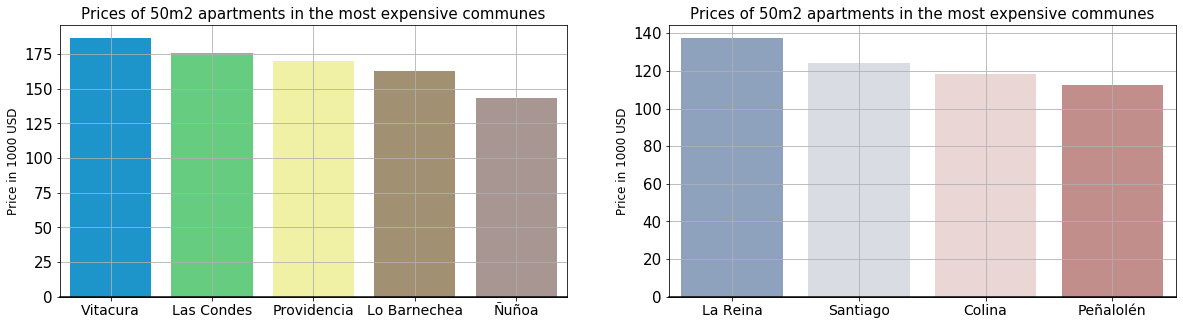

In [7]:
import seaborn as sns


f1, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

sns.barplot(x = zone1.index, y = zone1['USD/m2'], data=zone3 , palette = 'terrain', ax=ax1)
ax1.set_title('Prices of 50m2 apartments in the most expensive communes', fontsize = 15)
ax1.set_ylabel('Price in 1000 USD', fontsize=12)
ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.axhline(0, color="k", clip_on=False)
ax1.grid()

sns.barplot(x = zone2.index, y = zone2['USD/m2'], data=zone4, palette = 'vlag', ax=ax2)
ax2.set_title('Prices of 50m2 apartments in the most expensive communes', fontsize = 15)
ax2.set_ylabel('Price in 1000 USD', fontsize=12)
ax2.tick_params(axis='y', which='major', labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=14)
ax2.axhline(0, color="k", clip_on=False)
ax2.grid()


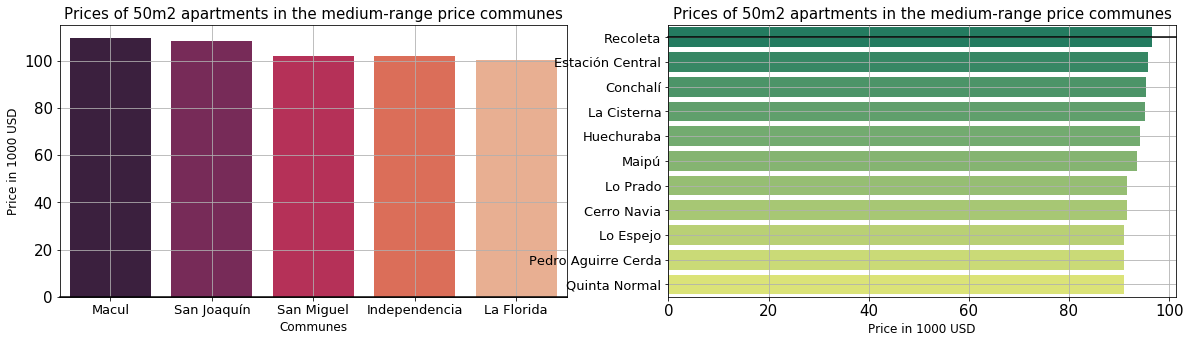

In [8]:
f2, (ax3,ax4) = plt.subplots(1,2, figsize=(20,5))

sns.barplot(x = zone3.index, y = zone3['USD/m2'], data=zone3 , palette = 'rocket', ax=ax3)
ax3.set_title('Prices of 50m2 apartments in the medium-range price communes', fontsize = 15)
ax3.set_ylabel('Price in 1000 USD', fontsize=12)
ax3.set_xlabel('Communes', fontsize=12)
ax3.tick_params(axis='y', which='major', labelsize=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.axhline(0, color="k", clip_on=False)
ax3.grid()

sns.barplot(x = zone4['USD/m2'], y = zone4.index , data=zone4, palette = 'summer', ax=ax4)
ax4.set_title('Prices of 50m2 apartments in the medium-range price communes', fontsize = 15)
ax4.set_xlabel('Price in 1000 USD', fontsize=12)
ax4.tick_params(axis='y', which='major', labelsize=13)
ax4.tick_params(axis='x', which='major', labelsize=15)
ax4.axhline(0, color="k", clip_on=False)
ax4.grid()


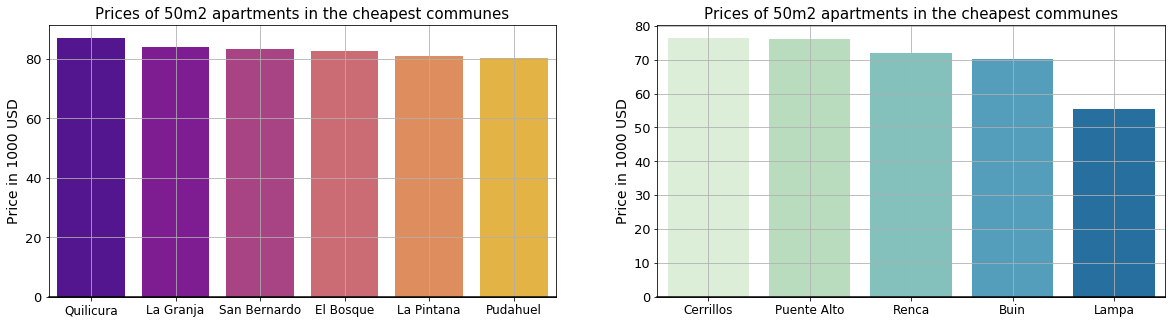

In [9]:
f3, (ax5,ax6) = plt.subplots(1,2, figsize=(20,5))

sns.barplot(x = zone5.index, y = zone5['USD/m2'], data=zone5 , palette = 'plasma', ax=ax5)
ax5.set_title('Prices of 50m2 apartments in the cheapest communes', fontsize = 15)
ax5.set_ylabel('Price in 1000 USD', fontsize=14)
ax5.tick_params(axis='y', which='major', labelsize=13)
ax5.tick_params(axis='x', which='major', labelsize=12)
ax5.axhline(0, color="k", clip_on=False)
ax5.grid()

sns.barplot(x = zone6.index, y = zone6['USD/m2'] , data=zone6, palette = 'GnBu', ax=ax6)
ax6.set_title('Prices of 50m2 apartments in the cheapest communes', fontsize = 15)
ax6.set_ylabel('Price in 1000 USD', fontsize=14)
ax6.tick_params(axis='y', which='major', labelsize=13)
ax6.tick_params(axis='x', which='major', labelsize=12)
ax6.axhline(0, color="k", clip_on=False)
ax6.grid()


In [93]:
# Before we start with the mapping section, we will use a dataframe with relevant coordinates

file2 = '/Users/diegop/Desktop/Capstone_Project/coord.xlsx'

df_coor = pd.read_excel(file2, index_col=0, dtype={'lat': float, 'long': float}) 


# We will add the index as column and reset the index.

df_coor = df_coor.reset_index()
df_coor.rename({'index':'Commune'}, axis=1, inplace = True)
df_coor

,Commune,Latitude,Longitude
0,Vitacura,-33.390521,-70.572412
1,Las Condes,-33.408784,-70.567069
2,Providencia,-33.431447,-70.609332
3,Lo Barnechea,-33.352669,-70.518517
4,Ñuñoa,-33.456668,-70.597841
5,La Reina,-33.441127,-70.534059
6,Santiago,-33.456939,-70.648369
7,Colina,-33.204500,-70.683330
8,Peñalolén,-33.471911,-70.562785
9,Macul,-33.485147,-70.599200


#### At this stage, I introduce you a map of Santiago

In [11]:
import folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# We now get Santiago coordinates

address = 'Santiago of Chile, SA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santiago de Chile are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Santiago de Chile are -33.462525, -70.6503756.


Now you will see a map of Santiago city, with markers on each commune

In [12]:
# definition of Santiago map
scl_map = folium.Map(width=1000, height=500, location=[latitude, longitude], zoom_start=11.5)

# instantiate a feature group for the communes in the dataframe
communes = folium.map.FeatureGroup()

# loop through the whole dataframe and add each of the communes to the feature group
for lat, lng, in zip(df_coor.Latitude, df_coor.Longitude):
    communes.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
lati = list(df_coor.Latitude)
longi = list(df_coor.Longitude)
labels = list(df_coor['Commune'])

for lat, lng, label in zip(lati, longi, labels):
    folium.Marker([lat, lng], popup=label).add_to(scl_map)    
    
# add communes to map
scl_map.add_child(communes)


In [13]:
# Adding the prices of 50m2 apartments to the new dataframe for future purposes and sorting in descending way
apts = df_new['USD/m2']*50
df_coor['50m2'] = apts.values
df_coor.sort_values('50m2', ascending = False, inplace = True)
df_coor.head()

,Commune,Latitude,Longitude,50m2
0,Vitacura,-33.390521,-70.572412,186.5405
1,Las Condes,-33.408784,-70.567069,175.5470
2,Providencia,-33.431447,-70.609332,170.1375
3,Lo Barnechea,-33.352669,-70.518517,162.6340
4,Ñuñoa,-33.456668,-70.597841,143.0900


### We will now explore Santiago city and its communes

 I will first configure the proper credentials to retrieve info from Foursquare

In [66]:
# Definition of credentials and version

CLIENT_ID = 'BXI21QFED1RKO0G3LHN02A5SCGQIYF2CKSTO11QZN5AXPHJD' # your Foursquare ID
CLIENT_SECRET = 'LTIODAHZIH4R141FNA2FSSRPHG3AQFRUFFJ3HDPC1RLPUOTV' # your Foursquare Secret
VERSION = '20200529'
LIMIT = 30
radius = 500

#### Let's create a function to process the desired communes


In [67]:
import requests # library to handle requests
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Commune', 
                  'Commune Latitude', 
                  'Commune Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
zone_venues = getNearbyVenues(names=df_coor['Commune'],
                                   latitudes=df_coor['Latitude'],
                                   longitudes=df_coor['Longitude'],
                                  radius = 500)


 Vitacura
 Las Condes
 Providencia
 Lo Barnechea
 Ñuñoa
 La Reina
 Santiago
 Colina
 Peñalolén
 Macul
 San Joaquín
 San Miguel
 Independencia
 La Florida
 Recoleta
 Estación Central
 Conchalí
 La Cisterna
 Huechuraba
 Maipú
 Quinta Normal
 Quilicura
 San Bernardo
 Pudahuel
 Cerrillos
 Puente Alto
 Renca
 Buin
 Lampa
 Lo Prado
 Cerro Navia
 Pedro Aguirre Cerda
 Lo Espejo
 La Granja
 La Pintana
 El Bosque


In [69]:
print('The shape of zone_venues is:', zone_venues.shape)
zone_venues.head()

The shape of zone_venues is: (488, 7)


,Commune,Commune Latitude,Commune Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vitacura,-33.390521,-70.572412,Alemán Experto,-33.390304,-70.570132,Sandwich Place
1,Vitacura,-33.390521,-70.572412,La Punta,-33.388667,-70.574879,Diner
2,Vitacura,-33.390521,-70.572412,Figurella,-33.387283,-70.571282,Spa
3,Vitacura,-33.390521,-70.572412,Club Deportivo Manquehue,-33.392995,-70.575027,Athletics & Sports
4,Vitacura,-33.390521,-70.572412,Bierstube Club Manquehue,-33.392455,-70.574623,Gastropub


#### Let's check how many venues were returned for each commune

In [70]:
n_venues = zone_venues.groupby('Commune').count()
n_venues.drop(['Commune Latitude', 'Commune Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis = 1, inplace = True)
n_venues.rename({'Venue':'Venues per Commune'}, axis = 1, inplace = True)
n_venues               


,Venues per Commune
Commune,
Buin,16
Cerrillos,6
Cerro Navia,4
Colina,7
Conchalí,5
El Bosque,2
Estación Central,30
Huechuraba,4
Independencia,5


Let's find out how many unique categories can be curated from all the returned venues

In [71]:
print('There are {} uniques categories.'.format(len(zone_venues['Venue Category'].unique())))

There are 139 uniques categories.


## Analizing each Commune


In [72]:
# one hot encoding
zone_onehot = pd.get_dummies(zone_venues[['Venue Category']], prefix="", prefix_sep="")

# add commune column back to dataframe
zone_onehot['Commune'] = zone_venues['Commune'] 

# move commune column to the first column
fixed_columns = [zone_onehot.columns[-1]] + list(zone_onehot.columns[:-1])
zone_onehot = zone_onehot[fixed_columns]

zone_onehot.head(10)

,Commune,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Court,...,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vitacura,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by commune and by taking the mean of the frequency of occurrence of each category

In [73]:
zone_grouped = zone_onehot.groupby('Commune').mean().reset_index()
zone_grouped

,Commune,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Court,...,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Buin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Cerrillos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,Cerro Navia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Colina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Conchalí,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,El Bosque,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Estación Central,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Huechuraba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,Independencia,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,La Cisterna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


#### Let's print each commune along with the top 5 most common venues

In [84]:
num_top_venues = 5

for hood in zone_grouped['Commune']:
    print("----"+hood+"----")
    temp = zone_grouped[zone_grouped['Commune'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Buin----
              venue  freq
0  Sushi Restaurant  0.19
1              Café  0.12
2             Plaza  0.12
3        Restaurant  0.06
4       Pizza Place  0.06


---- Cerrillos----
                 venue  freq
0  Rental Car Location  0.17
1               Bakery  0.17
2          Bus Station  0.17
3          Planetarium  0.17
4           Restaurant  0.17


---- Cerro Navia----
                   venue  freq
0           Liquor Store  0.25
1               Pharmacy  0.25
2          Grocery Store  0.25
3                 Bakery  0.25
4  Outdoors & Recreation  0.00


---- Colina----
           venue  freq
0  Grocery Store  0.14
1      Nightclub  0.14
2           Pool  0.14
3        Brewery  0.14
4            Gym  0.14


---- Conchalí----
                venue  freq
0        Liquor Store   0.2
1       Metro Station   0.2
2                 Gym   0.2
3            Pharmacy   0.2
4  Chinese Restaurant   0.2


---- El Bosque----
                   venue  freq
0            Pizza Place   0.5

#### Let's put that into a pandas dataframe


First, let's write a function to sort the venues in descending order.

In [85]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating the new dataframe and display the top 5 venues for each commune.

In [86]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Commune']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Commune'] = zone_grouped['Commune']

for ind in np.arange(zone_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zone_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Commune,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Buin,Sushi Restaurant,Plaza,Café,Soccer Field,Cocktail Bar
1,Cerrillos,Planetarium,Bus Station,Rental Car Location,Dessert Shop,Restaurant
2,Cerro Navia,Pharmacy,Liquor Store,Bakery,Grocery Store,Fast Food Restaurant
3,Colina,Brewery,Basketball Court,Pool,Bowling Alley,Grocery Store
4,Conchalí,Chinese Restaurant,Gym,Liquor Store,Pharmacy,Metro Station
5,El Bosque,Liquor Store,Pizza Place,Yoga Studio,Farmers Market,Food Truck
6,Estación Central,Shopping Mall,Pharmacy,Fried Chicken Joint,Sandwich Place,Business Service
7,Huechuraba,Plaza,Snack Place,Restaurant,Outdoors & Recreation,Farmers Market
8,Independencia,Scenic Lookout,Other Great Outdoors,BBQ Joint,Yoga Studio,Food Court
9,La Cisterna,Pizza Place,Chinese Restaurant,Fried Chicken Joint,Bar,Middle Eastern Restaurant


## Cluster Communes


In [87]:
# import k-means from clustering stage
from sklearn.cluster import KMeans


zone_grouped_clustering = zone_grouped.drop('Commune', 1)


In [88]:
zone_grouped.head()

,Commune,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Court,...,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Buin,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cerrillos,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cerro Navia,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Colina,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Conchalí,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


First, we determine the optimal k value using the Elbow method

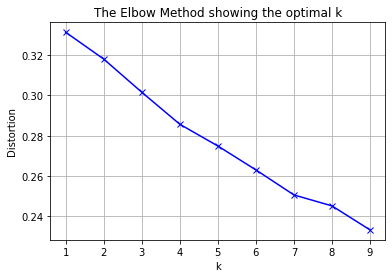

In [89]:
# determine k using elbow method
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(zone_grouped_clustering)
    kmeanModel.fit(zone_grouped_clustering)
    distortions.append(sum(np.min(cdist(zone_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / zone_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()



In [90]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zone_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 2, 1, 0, 3, 1], dtype=int32)

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [91]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

scl_merged = df_coor

# merge east_grouped with east_data to add latitude/longitude for each commune
scl_merged = scl_merged.join(neighborhoods_venues_sorted.set_index('Commune'), on='Commune')

scl_merged

,Commune,Latitude,Longitude,50m2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Vitacura,-33.390521,-70.572412,186.5405,1,Pizza Place,Pharmacy,Diner,Café,Bookstore
1,Las Condes,-33.408784,-70.567069,175.5470,1,Hotel,Coffee Shop,Cosmetics Shop,Pizza Place,Restaurant
2,Providencia,-33.431447,-70.609332,170.1375,1,Restaurant,Bakery,Café,Yoga Studio,Clothing Store
3,Lo Barnechea,-33.352669,-70.518517,162.6340,1,Sushi Restaurant,Burger Joint,Pizza Place,Gym,Diner
4,Ñuñoa,-33.456668,-70.597841,143.0900,1,Rock Club,Sandwich Place,Burger Joint,Bar,Yoga Studio
5,La Reina,-33.441127,-70.534059,137.5060,1,Italian Restaurant,Sushi Restaurant,Cupcake Shop,Pizza Place,Chinese Restaurant
6,Santiago,-33.456939,-70.648369,124.2440,1,Cupcake Shop,Martial Arts Dojo,Bus Station,Food Court,Food & Drink Shop
7,Colina,-33.204500,-70.683330,118.4855,1,Brewery,Basketball Court,Pool,Bowling Alley,Grocery Store
8,Peñalolén,-33.471911,-70.562785,112.3780,1,Bakery,Food Truck,Candy Store,Flea Market,Liquor Store
9,Macul,-33.485147,-70.599200,109.5860,1,Sushi Restaurant,Bar,Gymnastics Gym,Dive Bar,Sandwich Place


Finally, let's visualize the resulting clusters

In [92]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map with center in Ñuñoa
lat_nun = -33.456668
long_nun = -70.597841

map_clusters = folium.Map(location=[lat_nun, long_nun], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scl_merged['Latitude'], scl_merged['Longitude'], scl_merged['Commune'], scl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters


Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

In [94]:
# Cluster 0

scl_merged.loc[scl_merged['Cluster Labels'] == 0, scl_merged.columns[[0] + list(range(3, scl_merged.shape[1]))]]


,Commune,50m2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,Huechuraba,94.2300,0,Plaza,Snack Place,Restaurant,Outdoors & Recreation,Farmers Market
28,Lampa,82.5385,0,Plaza,Supermarket,Steakhouse,Snack Place,Deli / Bodega


In [95]:
# Cluster 1

scl_merged.loc[scl_merged['Cluster Labels'] == 1, scl_merged.columns[[0] + list(range(3, scl_merged.shape[1]))]]


,Commune,50m2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Vitacura,186.5405,1,Pizza Place,Pharmacy,Diner,Café,Bookstore
1,Las Condes,175.5470,1,Hotel,Coffee Shop,Cosmetics Shop,Pizza Place,Restaurant
2,Providencia,170.1375,1,Restaurant,Bakery,Café,Yoga Studio,Clothing Store
3,Lo Barnechea,162.6340,1,Sushi Restaurant,Burger Joint,Pizza Place,Gym,Diner
4,Ñuñoa,143.0900,1,Rock Club,Sandwich Place,Burger Joint,Bar,Yoga Studio
5,La Reina,137.5060,1,Italian Restaurant,Sushi Restaurant,Cupcake Shop,Pizza Place,Chinese Restaurant
6,Santiago,124.2440,1,Cupcake Shop,Martial Arts Dojo,Bus Station,Food Court,Food & Drink Shop
7,Colina,118.4855,1,Brewery,Basketball Court,Pool,Bowling Alley,Grocery Store
8,Peñalolén,112.3780,1,Bakery,Food Truck,Candy Store,Flea Market,Liquor Store
9,Macul,109.5860,1,Sushi Restaurant,Bar,Gymnastics Gym,Dive Bar,Sandwich Place


In [96]:
# Cluster 2

scl_merged.loc[scl_merged['Cluster Labels'] == 2, scl_merged.columns[[0] + list(range(3, scl_merged.shape[1]))]]


,Commune,50m2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
35,El Bosque,55.3165,2,Liquor Store,Pizza Place,Yoga Studio,Farmers Market,Food Truck


In [97]:
# Cluster 3

scl_merged.loc[scl_merged['Cluster Labels'] == 3, scl_merged.columns[[0] + list(range(3, scl_merged.shape[1]))]]


,Commune,50m2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,Independencia,101.908,3,Scenic Lookout,Other Great Outdoors,BBQ Joint,Yoga Studio,Food Court


In [98]:
import json
#comunas_geo = r'/Users/diegop/Desktop/Capstone_Project/geo/region_metropolitana_de_santiago/all.geojson'
comunas_geo = r'/Users/diegop/Desktop/Capstone_Project/geo/region_metropolitana_de_santiago/santiago/all.geojson'

# open the json file - json.load() methods returns a python dictionary
with open(comunas_geo) as comunas_file:
    comunas_json = json.load(comunas_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file
denominations_json = []
for index in range(len(comunas_json['features'])):
    denominations_json.append(comunas_json['features'][index]['properties']['NOM_COM'])
    
denominations_json

['Independencia',
 'La Florida',
 'Lo Barnechea',
 'Lo Espejo',
 'Lo Prado',
 'Pedro Aguirre Cerda',
 'Pudahuel',
 'San Joaquín',
 'San Ramón',
 'Cerrillos',
 'Cerro Navia',
 'Conchalí',
 'El Bosque',
 'Peñalolén',
 'Providencia',
 'Quilicura',
 'Vitacura',
 'Quinta Normal',
 'Recoleta',
 'Renca',
 'San Miguel',
 'Santiago',
 'Huechuraba',
 'La Cisterna',
 'La Granja',
 'La Pintana',
 'La Reina',
 'Las Condes',
 'Macul',
 'Maipú',
 'Ñuñoa',
 'Estación Central']

In [99]:
# This step is necessary to math the names of the dataframe with the commune names of the json file
dataframe_names = scl_merged.Commune.tolist()

# names in the json file - the same order as in the data frame 
geojson_names = ['Vitacura', 'Las Condes', 'Providencia', 'Lo Barnechea', 'Ñuñoa', 'La Reina', 'Santiago',
                 'Colina', 'Peñalolén', 'Macul', 'San Joaquín', 'San Miguel', 'Independencia',
                 'La Florida', 'Recoleta', 'Estación Central', 'Conchalí', 'La Cisterna', 'Huechuraba', 'Maipú',
                 'Lo Prado', 'Cerro Navia', 'Lo Espejo', 'Pedro Aguirre Cerda', 'Quinta Normal', 'Quilicura', 
                 'La Granja', 'San Bernardo', 'El Bosque', 'La Pintana', 'Pudahuel', 'Cerrillos', 'Puente Alto', 
                 'Renca','Buin', 'Lampa']

# replace data frame names by json names
scl_merged.replace(dict(zip(dataframe_names, geojson_names)), inplace=True)


In [100]:
# create a plain SCL map
comunas_map = folium.Map(location=[-33.4566, -70.5978], zoom_start=11, tiles='OpenStreetMap')

# add tile layers to the map
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']

for tile in tiles:
    folium.TileLayer(tile).add_to(comunas_map)

# generate choropleth map 
choro = folium.Choropleth( geo_data=comunas_geo, data=scl_merged, columns=['Commune', '50m2'],
                          key_on='feature.properties.NOM_COM', fill_color='YlGnBu', fill_opacity=1.0, 
                          line_opacity=0.5, legend_name='Distribution of prices for 50m2 new apartments in Santiago',
                          smooth_factor=0.6, highlight = True).add_to(comunas_map)

# add labels indicating the name of the comune
style_function = "font-size: 15px; font-weight: bold"
choro.geojson.add_child(folium.features.GeoJsonTooltip(['NOM_COM'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(comunas_map)

# display map
comunas_map

### Taking into account the above information (clusters, venues and prices), I would recommend to buy a property in Vitacura (1st choice) or Las Condes (2nd choice).